# Machine Learning

In [1]:
# Pacotes
#! pip install xgboost
import joblib
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy import stats
import imblearn
from imblearn.over_sampling import SMOTE
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

### Carregando Dados


In [2]:
df = pd.read_csv('dados/dataset.csv')

In [3]:
df.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
392,41,Male,7.5,4.3,149,94,92,6.3,3.1,0.90,1
516,60,Male,0.9,0.3,168,16,24,6.7,3.0,0.80,1
187,60,Male,2.1,1.0,191,114,247,4.0,1.6,0.60,1
148,50,Male,0.9,0.2,202,20,26,7.2,4.5,1.66,1
399,27,Male,1.0,0.2,205,137,145,6.0,3.0,1.00,1


In [4]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [5]:
def ecod_func_D (x):
    if x == 1:
        return 0
    return 1

df['Dataset'] = df['Dataset'].map(ecod_func_D)


In [6]:
df['Dataset'].value_counts()

0    416
1    167
Name: Dataset, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [8]:
onehots = pd.get_dummies(df['Gender'], prefix = 'Gender')
df = df.join(onehots, )
df.drop('Gender', 1, inplace= True)
df.sample(5)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
56,33,0.8,0.2,198,26,23,8.0,4.0,1.00,1,0,1
477,55,0.6,0.2,220,24,32,5.1,2.4,0.88,0,0,1
16,38,1.8,0.8,342,168,441,7.6,4.4,1.30,0,0,1
478,33,7.1,3.7,196,622,497,6.9,3.6,1.09,0,0,1
11,72,2.7,1.3,260,31,56,7.4,3.0,0.60,0,0,1


### Análise Exploratoria 

In [9]:
df.dtypes

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
Gender_Female                   uint8
Gender_Male                     uint8
dtype: object

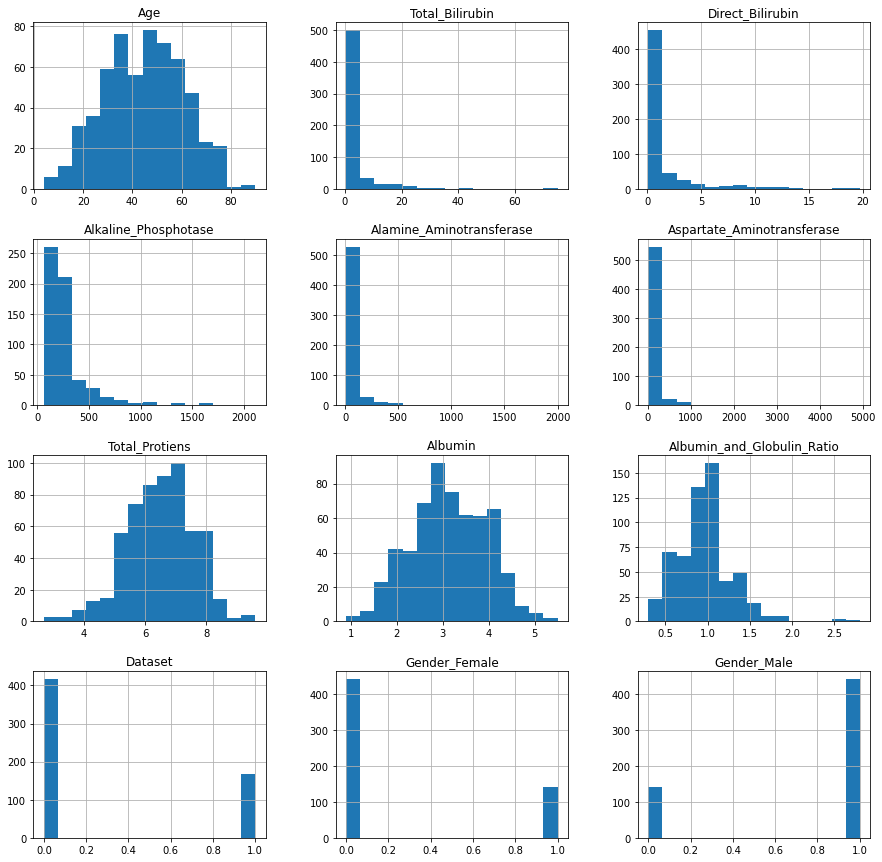

In [10]:
df.hist(figsize = (15, 15), bins = 15)
plt.show()

In [11]:

lista_col = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset']

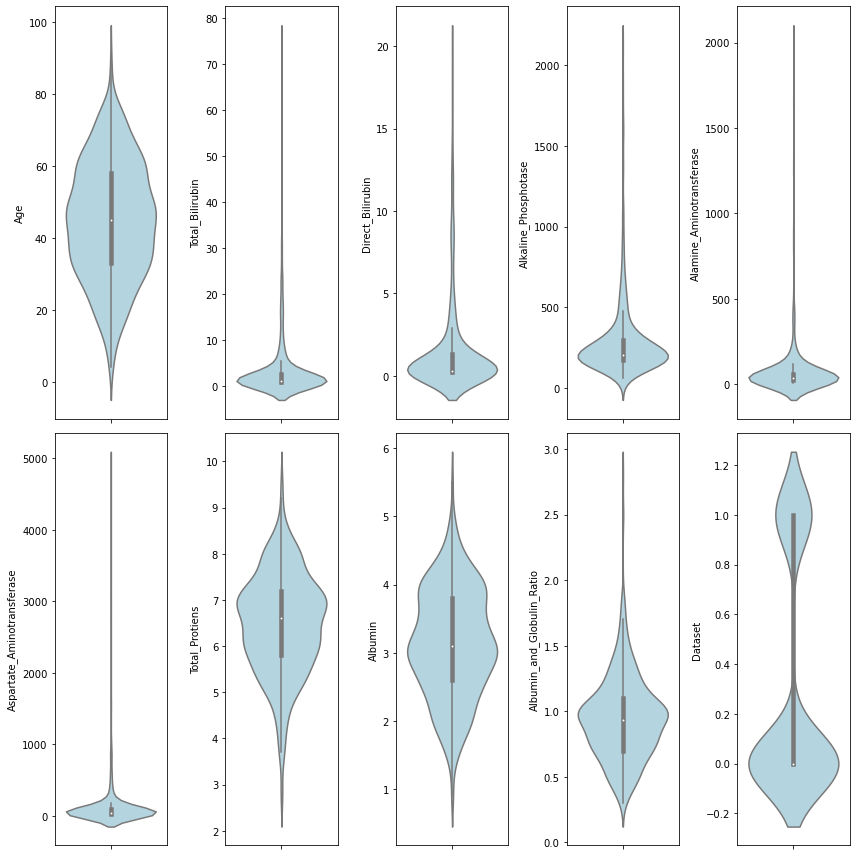

In [12]:
plt.figure(figsize= (12,12))
for i in range(0, len(lista_col)):
    plt.subplot(2, int(len(lista_col)/2), i + 1)
    sns.violinplot(y = df[lista_col[i]], 
                   color = 'lightblue')
    plt.tight_layout()

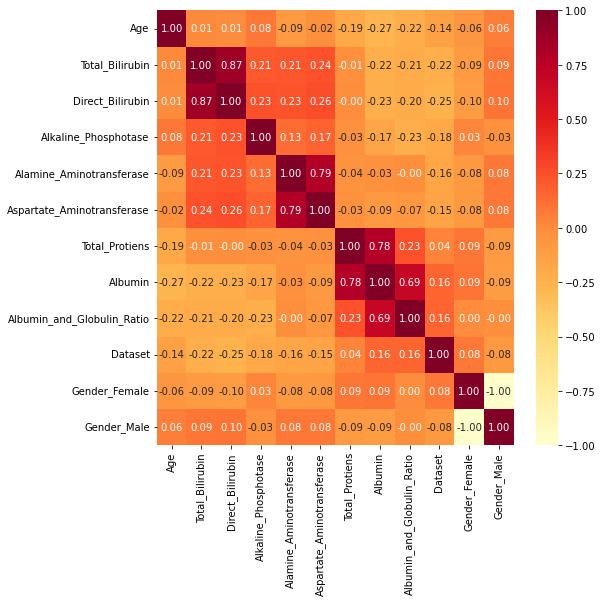

In [13]:
#Analise de correlação 
corr_df = df.corr()
plt.figure(figsize= (8,8))

sns.heatmap(corr_df,
           cmap = 'YlOrRd',
           annot = True,
           fmt = '.2f');

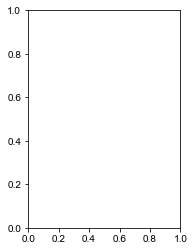

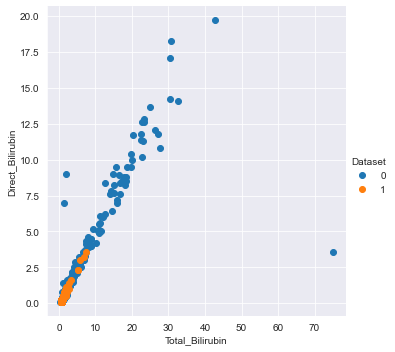

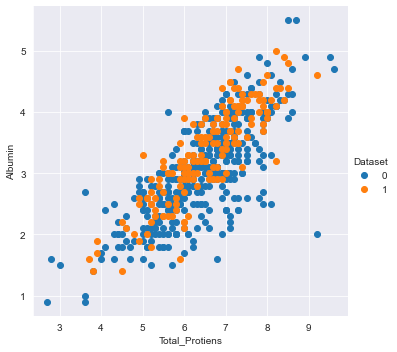

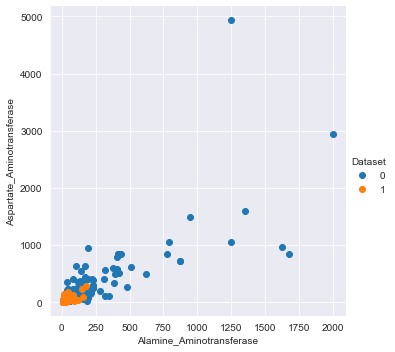

In [14]:
#Facegrid para detecção de multicolinearidade
plt.subplot(1, 2, 2)
sns.set_style('darkgrid')
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend();
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Protiens', 'Albumin').add_legend();
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase').add_legend();

### Limpando Valores Ausentes, Registros Duplicados e Outliers


In [15]:
df[df.isnull().values]

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
209,45,0.9,0.3,189,23,33,6.6,3.9,NaN,0,1,0
241,51,0.8,0.2,230,24,46,6.5,3.1,NaN,0,0,1
253,35,0.6,0.2,180,12,15,5.2,2.7,NaN,1,1,0
312,27,1.3,0.6,106,25,54,8.5,4.8,NaN,1,0,1


In [16]:
# Tratamento de Valores NA
df = df.dropna(how = 'any')
df[df.isnull().values]

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male


In [17]:
# Tratamento de Valores Duplicados
df = df.drop_duplicates()
df.shape

(566, 12)

In [18]:
registros = np.array([True] * len(df))
lista_col_nums = ['Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']
# Loop por cada variável numérica
for col in lista_col_nums:
    
    # Calcula o z-score absoluto
    zscore = abs(stats.zscore(df[col])) 
    
    # Mantém valores com menos de t z-score absoluto
    registros = (zscore < 7) & registros

In [19]:
np.count_nonzero(registros == True)

560

In [20]:
np.count_nonzero(registros == False)

6

In [21]:
df[registros == False].describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.0,6.0
mean,43.333333,18.050000,3.350000,702.666667,1108.000000,1640.000000,6.200000,3.000000,0.966667,0.0,0.0,1.0
std,14.023789,28.294222,2.301087,772.025561,857.871785,1923.160628,0.846168,0.589915,0.355903,0.0,0.0,0.0
min,32.000000,1.100000,0.300000,194.000000,40.000000,66.000000,4.900000,2.400000,0.500000,0.0,0.0,1.0
25%,33.250000,3.050000,1.800000,232.500000,348.500000,279.250000,5.825000,2.575000,0.675000,0.0,0.0,1.0
50%,37.000000,8.750000,3.300000,286.000000,1440.000000,905.000000,6.200000,2.900000,1.050000,0.0,0.0,1.0
75%,51.250000,12.350000,5.100000,915.500000,1667.500000,2449.500000,6.800000,3.225000,1.275000,0.0,0.0,1.0
max,66.000000,75.000000,6.200000,2110.000000,2000.000000,4929.000000,7.200000,4.000000,1.300000,0.0,0.0,1.0


In [22]:
df = df[registros]

In [23]:
df.shape

(560, 12)

### Pré-Processamento dos Dados

#### Retirar Variáveis com Multicoliriariedade

In [24]:
df.drop('Direct_Bilirubin', 1 , inplace= True)

#### Padronização dos Dados

In [25]:
# Aplicando padronização
df_Stdrd_Sclr = df.drop('Dataset', 1)
scaled_features = StandardScaler().fit_transform(df_Stdrd_Sclr.values)
df_Stdrd_Sclr = pd.DataFrame(scaled_features, index= df_Stdrd_Sclr.index, columns= df_Stdrd_Sclr.columns)

In [26]:
df_Stdrd_Sclr.sample(5)

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
363,-0.178212,-0.413855,-0.530633,-0.347278,-0.388543,1.838362,1.571572,0.163478,1.748706,-1.748706
246,0.619687,-0.250581,-0.069675,-0.379486,-0.087339,-0.365508,-0.560892,-0.776115,-0.571852,0.571852
284,-1.651256,-0.413855,0.050950,-0.315071,-0.274085,1.379222,1.069816,0.163478,-0.571852,0.571852
495,-0.791980,-0.450138,-0.530633,-0.307019,-0.388543,-0.365508,-0.184575,0.038199,-0.571852,0.571852
420,0.619687,1.400303,4.574378,-0.170138,-0.219869,-0.090024,-1.062648,-1.402510,1.748706,-1.748706


In [27]:
df_Stdrd_Sclr['Dataset'] = df.Dataset
df = df_Stdrd_Sclr

In [28]:
df.sample(5)

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male,Dataset
10,0.742441,-0.468279,-0.336772,-0.145983,-0.207820,-0.549164,-0.560892,-0.462917,-0.571852,0.571852,0
244,0.558310,-0.431996,-0.302308,-0.395589,-0.448784,-0.181852,-0.811770,-1.089313,-0.571852,0.571852,0
349,0.251426,-0.431996,-0.560790,-0.403641,-0.472880,0.093632,0.568060,0.789873,1.748706,-1.748706,1
266,1.049325,-0.359430,-0.401393,-0.250656,-0.237941,-0.181852,0.818938,1.729467,-0.571852,0.571852,0
259,-0.178212,4.956052,-0.013670,-0.033257,0.219890,-1.191959,-1.313526,-1.089313,-0.571852,0.571852,0


#### Divisão dos Dados

In [29]:
# Variável Alvo
y = df.Dataset
y

0      0
1      0
2      0
3      0
4      0
      ..
578    1
579    0
580    0
581    0
582    1
Name: Dataset, Length: 560, dtype: int64

In [30]:
#Retirando Variavel Alvo do Dataset
x = df.drop('Dataset', 1)
x

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,1.233455,-0.450138,-0.435857,-0.427797,-0.454808,0.277287,0.191743,-0.149720,1.748706,-1.748706
1,1.049325,1.400303,1.769853,-0.041309,0.039167,0.920083,0.066304,-0.650836,-0.571852,0.571852
2,1.049325,0.747206,0.869475,-0.073516,-0.153604,0.460943,0.191743,-0.181039,-0.571852,0.571852
3,0.803817,-0.395713,-0.457397,-0.443900,-0.442760,0.277287,0.317182,0.163478,-0.571852,0.571852
4,1.663093,0.130393,-0.401393,-0.339226,-0.207820,0.736427,-0.937209,-1.715708,-0.571852,0.571852
...,...,...,...,...,...,...,...,...,...,...
578,0.926571,-0.486421,0.912555,-0.395589,-0.358423,-0.549164,-1.940722,-1.809667,-0.571852,0.571852
579,-0.300966,-0.468279,-0.819271,-0.274812,-0.376495,-0.457336,0.066304,0.476676,-0.571852,0.571852
580,0.435556,-0.431996,-0.185991,-0.170138,-0.268061,-0.090024,0.066304,0.163478,-0.571852,0.571852
581,-0.853357,-0.341288,-0.448781,-0.323123,-0.370471,0.277287,0.317182,0.163478,-0.571852,0.571852


In [31]:
#Separando Dados
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 1234,
                                                    stratify= df.Dataset)

#### Balanceamento de Classe

In [32]:
# Caso necessário a intalação do pacote
#conda install -c conda-forge imbalanced-learn

In [33]:
y_train.value_counts()

0    298
1    122
Name: Dataset, dtype: int64

In [34]:
# Aplicação de Oversampling para Aumento de exemplos da Classe Minoritária

over_sampler = SMOTE(k_neighbors= 2)
x_over_train, y_over_train = over_sampler.fit_resample(x_train, y_train)


In [35]:
y_over_train.value_counts()


1    298
0    298
Name: Dataset, dtype: int64

### Primeiro Modelo: Regressão Logística (Modelo Base)

In [36]:
# Dicionário de Hiperparâmetros

params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
            'penalty': ['l1', 'l2', 'none','elasticnet']}

In [37]:
# Modelo Base

model_v1 = GridSearchCV(LogisticRegression(), 
                        params_v1,
                        scoring= 'roc_auc',
                        n_jobs= -1)

In [38]:
model_v1.fit(x_over_train, y_over_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2', 'none', 'elasticnet']},
             scoring='roc_auc')

In [39]:
# Melhores Parâmetros
model_v1.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [40]:
# Fazendo Previsões
y_prev_v1 = model_v1.predict(x_test)

In [41]:
#Provabilidade da Previsão
y_prev_prob_v1 = model_v1.predict_proba(x_test)[:,1]

In [42]:
# Matriz de Confusão 
tn1, fp1, fn1, tp1 = confusion_matrix(y_test, y_prev_v1).ravel()

In [43]:
# ROC score
roc_auc_v1 = roc_auc_score(y_test, y_prev_v1)
roc_auc_v1

0.7450000000000001

In [44]:
# AUC Score
fpr_v1, tpr_v1, thresholds = roc_curve(y_test, y_prev_prob_v1)
auc_v1 = auc(fpr_v1,tpr_v1)
auc_v1

0.8205

In [45]:
# Acurácia 
acc_v1 = accuracy_score(y_test, y_prev_v1)
acc_v1

0.7

In [46]:
# Criando Tabela para Comparação
dic_model_1 = {'Nome': 'model_v1', 
              'Algoritmo': 'Regressão Logistica', 
              'ROC_AUC Score': roc_auc_v1, 
              'AUC Score': auc_v1, 
              'Acurácia': acc_v1, 
              'Verdadeiro Negativo': tn1, 
              'Falso Negativo': fn1,
              'Verdadeiro Positivo': tp1,
              'Falso Positivo': fp1
             }
df_models = pd.DataFrame(dic_model_1, index = [0])
df_models

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia,Verdadeiro Negativo,Falso Negativo,Verdadeiro Positivo,Falso Positivo
0,model_v1,Regressão Logistica,0.745,0.8205,0.7,64,6,34,36


### Segundo Modelo: Randon Forest

In [47]:
# Hiperparâmetros 
params_v2 = {'n_estimators': [100, 200, 300, 400, 500, 600], 
             'min_samples_split': [2, 5, 10], 
             'min_samples_leaf': [1, 2, 4]}

In [48]:
# Criando o Modelo
model_v2 = RandomizedSearchCV(RandomForestClassifier(), 
                              params_v2,
                              n_iter= 15, 
                              scoring = 'roc_auc',
                              n_jobs = -1)

In [49]:

model_v2.fit(x_over_train, y_over_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600]},
                   scoring='roc_auc')

In [50]:
# Melhores Parâmetros
model_v2.best_params_

{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1}

In [51]:
#Previsão
y_prev_v2 = model_v2.predict(x_test)

In [52]:
#Provabilidade da Previsão
y_prev_prob_v2 = model_v2.predict_proba(x_test)[:,1]

In [53]:
# Matriz de Confusão 
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_prev_v2).ravel()

In [54]:
# ROC score
roc_auc_v2 = roc_auc_score(y_test, y_prev_v2)
roc_auc_v2

0.665

In [55]:
# AUC Score
fpr_v2, tpr_v2, thresholds = roc_curve(y_test, y_prev_prob_v2)
auc_v2 = auc(fpr_v2,tpr_v2)
auc_v2

0.748875

In [56]:
# Acurácia 
acc_v2 = accuracy_score(y_test, y_prev_v2)
acc_v2

0.7142857142857143

In [57]:
# Adicionando Resultados
dic_model_2 = {'Nome': 'model_v2', 
              'Algoritmo': 'Random Forest', 
              'ROC_AUC Score': roc_auc_v2, 
              'AUC Score': auc_v2, 
              'Acurácia': acc_v2, 
              'Verdadeiro Negativo': tn2, 
              'Falso Negativo': fn2,
              'Verdadeiro Positivo': tp2,
              'Falso Positivo': fp2
             }
df_models = df_models.append(dic_model_2, ignore_index= True)
df_models

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia,Verdadeiro Negativo,Falso Negativo,Verdadeiro Positivo,Falso Positivo
0,model_v1,Regressão Logistica,0.745,0.820500,0.700000,64,6,34,36
1,model_v2,Random Forest,0.665,0.748875,0.714286,78,18,22,22


### Terceiro Modelo: KNN

In [58]:
# Lista de Valores Possíveis para K
neighborhood = list(range(1, 20, 1))

In [59]:
# Lista do score 
cv_scores = []

In [60]:
# Validação cruzada para determinar o melhor valor de k

for i in neighborhood:
    knn = KNeighborsClassifier(n_neighbors= i)
    scores = cross_val_score(knn, 
                             x_over_train, 
                             y_over_train, 
                             cv = 3, 
                             scoring= 'accuracy')
    cv_scores.append(scores.mean())

In [61]:
# Ajustando o Erro da Classificação
error = [1 - x for x in cv_scores]

In [62]:
# Valor com Menor Erro
neighborhood[error.index(min(error))]

1

In [63]:
# Treinamento do Modelo
model_v3 = KNeighborsClassifier(n_neighbors= 1)
model_v3.fit(x_over_train, y_over_train)

KNeighborsClassifier(n_neighbors=1)

In [64]:
# Previsão
y_prev_v3 = model_v3.predict(x_test)

In [65]:
#Provabilidade da Previsão
y_prev_prob_v3 = model_v3.predict_proba(x_test)[:,1]

In [66]:
# Matriz de Confusão 
tn3, fp3, fn3, tp3 = confusion_matrix(y_test, y_prev_v3).ravel()

In [67]:
# ROC score
roc_auc_v3 = roc_auc_score(y_test, y_prev_v3)
roc_auc_v3

0.49749999999999994

In [68]:
fpr_v3, tpr_v3, thresholds = roc_curve(y_test, y_prev_prob_v3)
auc_v3 = auc(fpr_v3,tpr_v3)
auc_v3

0.49749999999999994

In [69]:
# Acurácia 
acc_v3 = accuracy_score(y_test, y_prev_v3)
acc_v3

0.5928571428571429

In [70]:
# Adicionando Resultados
dic_model_3 = {'Nome': 'model_v3', 
              'Algoritmo': 'KNN', 
              'ROC_AUC Score': roc_auc_v3, 
              'AUC Score': auc_v3, 
              'Acurácia': acc_v3, 
              'Verdadeiro Negativo': tn3, 
              'Falso Negativo': fn3,
              'Verdadeiro Positivo': tp3,
              'Falso Positivo': fp3
             }
df_models = df_models.append(dic_model_3, ignore_index= True)
df_models

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia,Verdadeiro Negativo,Falso Negativo,Verdadeiro Positivo,Falso Positivo
0,model_v1,Regressão Logistica,0.7450,0.820500,0.700000,64,6,34,36
1,model_v2,Random Forest,0.6650,0.748875,0.714286,78,18,22,22
2,model_v3,KNN,0.4975,0.497500,0.592857,72,29,11,28


### Quarto Modelo: Decision Tree

In [71]:
#Dicionário de Hiperparâmetros
params_v4 = {'min_samples_split': [1, 2, 3, 4, 5, 6, 7], 
             'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7], 
             'max_depth': [1, 2, 3, 4, 5, 6, 7]}

In [72]:
# Criando o Modelo 
model_v4 = RandomizedSearchCV(DecisionTreeClassifier(),
                              params_v4, 
                              n_iter = 15, 
                              scoring = 'roc_auc', 
                              n_jobs = -1)

In [73]:
# Treinando o Modelo
model_v4.fit(x_over_train, y_over_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7]},
                   scoring='roc_auc')

In [74]:
# Melhores Parâmetros
model_v4.best_params_

{'min_samples_split': 3, 'min_samples_leaf': 5, 'max_depth': 7}

In [75]:
#Previsão
y_prev_v4 = model_v4.predict(x_test)

In [76]:
#Provabilidade da Previsão
y_prev_prob_v4 = model_v4.predict_proba(x_test)[:,1]

In [77]:
# Matriz de Confusão 
tn4, fp4, fn4, tp4 = confusion_matrix(y_test, y_prev_v4).ravel()

In [78]:
# ROC score
roc_auc_v4 = roc_auc_score(y_test, y_prev_v4)
roc_auc_v4


0.6525

In [79]:
fpr_v4, tpr_v4, thresholds = roc_curve(y_test, y_prev_prob_v4)
auc_v4 = auc(fpr_v4,tpr_v4)
auc_v4

0.680125

In [80]:
# Acurácia 
acc_v4 = accuracy_score(y_test, y_prev_v4)
acc_v4

0.6428571428571429

In [81]:
# Adicionando Resultados
dic_model_4 = {'Nome': 'model_v4', 
              'Algoritmo': 'Decision Tree', 
              'ROC_AUC Score': roc_auc_v4, 
              'AUC Score': auc_v4, 
              'Acurácia': acc_v4, 
              'Verdadeiro Negativo': tn4, 
              'Falso Negativo': fn4,
              'Verdadeiro Positivo': tp4,
              'Falso Positivo': fp4
             }
df_models = df_models.append(dic_model_4, ignore_index= True)
df_models

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia,Verdadeiro Negativo,Falso Negativo,Verdadeiro Positivo,Falso Positivo
0,model_v1,Regressão Logistica,0.7450,0.820500,0.700000,64,6,34,36
1,model_v2,Random Forest,0.6650,0.748875,0.714286,78,18,22,22
2,model_v3,KNN,0.4975,0.497500,0.592857,72,29,11,28
3,model_v4,Decision Tree,0.6525,0.680125,0.642857,63,13,27,37


### Quinto Modelo: Support Vector Machine 

In [82]:
#Dicionário de Hiperparâmetros
params_v5 = {'C': [0.001, 0.01, 0.1, 1, 10], 
             'gamma': [0.001, 0.01, 0.1, 1], 
            }

In [83]:
# Criando o Modelo 
model_v5 = GridSearchCV(SVC(kernel= 'rbf', probability= True), 
                        params_v5, 
                        cv = 5)

In [84]:
# Treinando o Modelo
model_v5.fit(x_over_train, y_over_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]})

In [85]:
# Melhores Parâmetros
model_v5.best_params_

{'C': 10, 'gamma': 1}

In [86]:
# Previsão
y_prev_v5 = model_v5.predict(x_test)

In [87]:
#Provabilidade da Previsão
y_prev_prob_v5 = model_v5.predict_proba(x_test)[:,1]

In [88]:
# Matriz de Confusão 
tn5, fp5, fn5, tp5 = confusion_matrix(y_test, y_prev_v5).ravel()

In [89]:
# ROC score
roc_auc_v5 = roc_auc_score(y_test, y_prev_v5)
roc_auc_v5

0.54

In [90]:
fpr_v5, tpr_v5, thresholds = roc_curve(y_test, y_prev_prob_v5)
auc_v5 = auc(fpr_v5,tpr_v5)
auc_v5

0.5487500000000001

In [91]:
# Acurácia 
acc_v5 = accuracy_score(y_test, y_prev_v5)
acc_v5

0.6428571428571429

In [92]:
# Adicionando Resultados
dic_model_5 = {'Nome': 'model_v5', 
              'Algoritmo': 'Suport Vector Machine', 
              'ROC_AUC Score': roc_auc_v5, 
              'AUC Score': auc_v5, 
              'Acurácia': acc_v5, 
              'Verdadeiro Negativo': tn5, 
              'Falso Negativo': fn5,
              'Verdadeiro Positivo': tp5,
              'Falso Positivo': fp5
             }
df_models = df_models.append(dic_model_5, ignore_index= True)
df_models

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia,Verdadeiro Negativo,Falso Negativo,Verdadeiro Positivo,Falso Positivo
0,model_v1,Regressão Logistica,0.7450,0.820500,0.700000,64,6,34,36
1,model_v2,Random Forest,0.6650,0.748875,0.714286,78,18,22,22
2,model_v3,KNN,0.4975,0.497500,0.592857,72,29,11,28
3,model_v4,Decision Tree,0.6525,0.680125,0.642857,63,13,27,37
4,model_v5,Suport Vector Machine,0.5400,0.548750,0.642857,78,28,12,22


### Sexto Modelo: Gradient Boosting Regressor

In [93]:
#Dicionário de Hiperparâmetros
params_v6 = {'learning_rate': [0.01,0.02,0.03,0.04],
             'subsample': [0.9, 0.5, 0.2, 0.1],
             'n_estimators': [100,500,1000, 1500],
             'max_depth': [4,6,8,10],
            }

In [94]:
# Criando o Modelo 
model_v6 = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), 
                        params_v6, 
                        cv = 2, 
                        n_jobs=-1)

In [95]:
# Treinando o Modelo
model_v6.fit(x_over_train, y_over_train)

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [96]:
# Melhores Parâmetros
model_v6.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1500, 'subsample': 0.5}

In [97]:
# Previsão
y_prev_v6 = model_v6.predict(x_test)

In [98]:
#Provabilidade da Previsão
y_prev_prob_v6 = model_v6.predict_proba(x_test)[:,1]

In [99]:
# Matriz de Confusão 
tn6, fp6, fn6, tp6 = confusion_matrix(y_test, y_prev_v6).ravel()

In [100]:
# ROC score
roc_auc_v6 = roc_auc_score(y_test, y_prev_v6)
roc_auc_v6

0.625

In [101]:
fpr_v6, tpr_v6, thresholds = roc_curve(y_test, y_prev_prob_v6)
auc_v6 = auc(fpr_v6,tpr_v6)
auc_v6

0.70775

In [102]:
# Acurácia 
acc_v6 = accuracy_score(y_test, y_prev_v6)
acc_v6

0.7

In [103]:
# Adicionando Resultados
dic_model_6 = {'Nome': 'model_v6', 
              'Algoritmo': 'Gradient Boosting Regressor', 
              'ROC_AUC Score': roc_auc_v6, 
              'AUC Score': auc_v6, 
              'Acurácia': acc_v6, 
              'Verdadeiro Negativo': tn6, 
              'Falso Negativo': fn6,
              'Verdadeiro Positivo': tp6,
              'Falso Positivo': fp6
             }
df_models = df_models.append(dic_model_6, ignore_index= True)
df_models

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia,Verdadeiro Negativo,Falso Negativo,Verdadeiro Positivo,Falso Positivo
0,model_v1,Regressão Logistica,0.7450,0.820500,0.700000,64,6,34,36
1,model_v2,Random Forest,0.6650,0.748875,0.714286,78,18,22,22
2,model_v3,KNN,0.4975,0.497500,0.592857,72,29,11,28
3,model_v4,Decision Tree,0.6525,0.680125,0.642857,63,13,27,37
4,model_v5,Suport Vector Machine,0.5400,0.548750,0.642857,78,28,12,22
5,model_v6,Gradient Boosting Regressor,0.6250,0.707750,0.700000,80,22,18,20
